# Spatial Domain Filtering

**Sri Lakshmi Prasanna Koneru** - _S20190010168_

---


In [85]:
# Importing respective modules
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL


In [86]:
# Upload your respective pic
# from google.colab import files
# uploaded = files.upload()


In [87]:
# Reading .tif image
image = cv2.imread('Sample_3.tif')


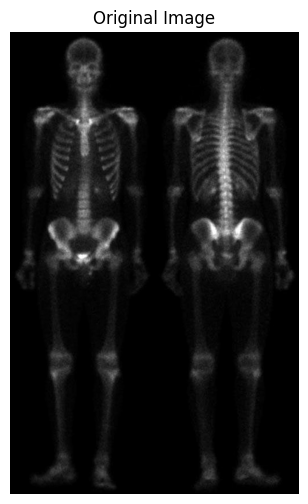

In [88]:
# For Original Image
def plotting_image(image, information):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(information)
    plt.axis('off')

# For gray Image


def grayImage(image, information):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title(information)
    plt.axis('off')


plotting_image(image, 'Original Image')


In [89]:
def normalize_function(pixels):
    mini = pixels.min()
    maxi = pixels.max()
    pixels = pixels - mini
    pixels = pixels.astype(float)
    pixels *= (255/(maxi-mini))
    return pixels.astype(np.uint8)


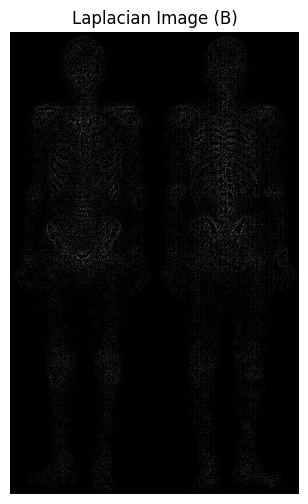

In [90]:
# For Laplacian Image (B)
kernel_array = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplacian_image = cv2.filter2D(image, -1, kernel_array)
laplacian_image = normalize_function(laplacian_image)
gray = cv2.cvtColor(laplacian_image, cv2.COLOR_BGR2GRAY)

grayImage(gray, 'Laplacian Image (B)')


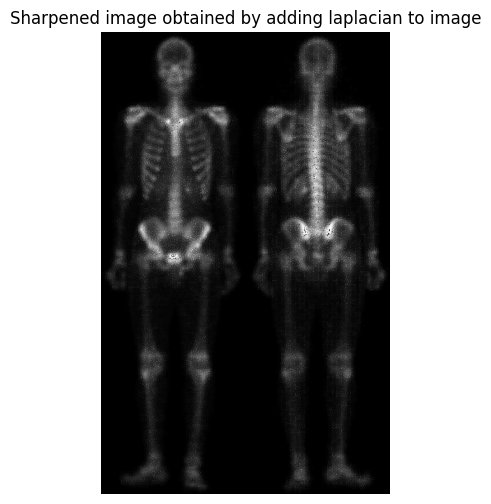

In [91]:
# For sharpened image obtained by adding laplacian to image (C)
plotting_image(normalize_function(image+laplacian_image),
               'Sharpened image obtained by adding laplacian to image')


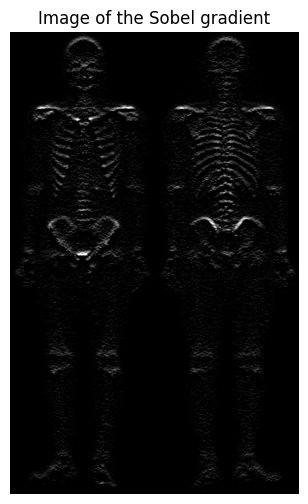

In [92]:
# For Sobel gradient image (D)
kernel_array = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_image = cv2.filter2D(image, -1, kernel_array)
sobel_image = normalize_function(sobel_image)

plotting_image(sobel_image, information="Image of the Sobel gradient")


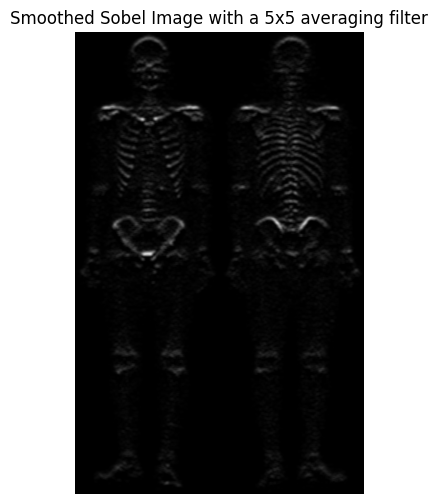

In [93]:
# For Smoothed Sobel Image with a 5x5 averaging filter (E)
kernel_array = np.ones((5, 5))/25
sobel_image_smooth = cv2.filter2D(sobel_image, -1, kernel_array)

plotting_image(sobel_image_smooth,
               information="Smoothed Sobel Image with a 5x5 averaging filter")


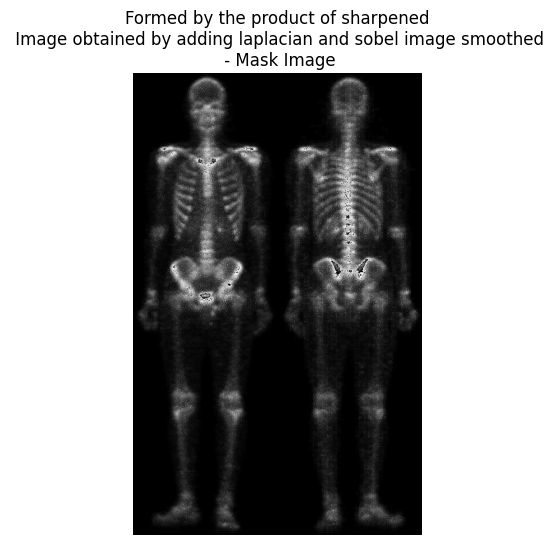

In [94]:
# Formed by the product of sharpened Image obtained by adding laplacian and sobel image smoothed- Mask Image (F)
kernals = 1
masked_image = sobel_image_smooth + kernals*(image+laplacian_image)
masked_image = normalize_function(masked_image)

plotting_image(masked_image, information="Formed by the product of sharpened\n Image obtained by adding laplacian and sobel image smoothed\n - Mask Image")


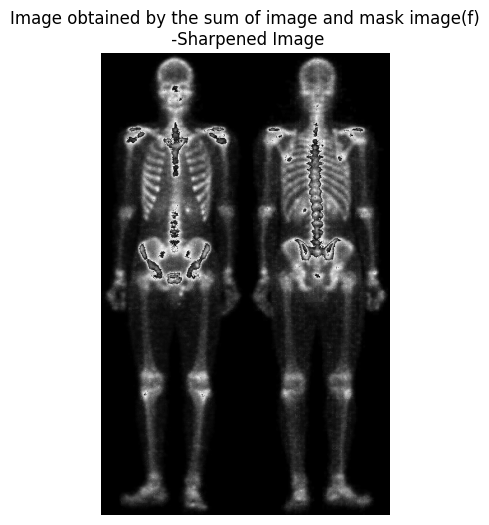

In [95]:
# Image obtained by the sum of image and mask image(f) - Sharped Image (G)
Image_masked = image+masked_image
Image_masked = normalize_function(Image_masked)

plotting_image(Image_masked,
               information="Image obtained by the sum of image and mask image(f)\n -Sharpened Image")


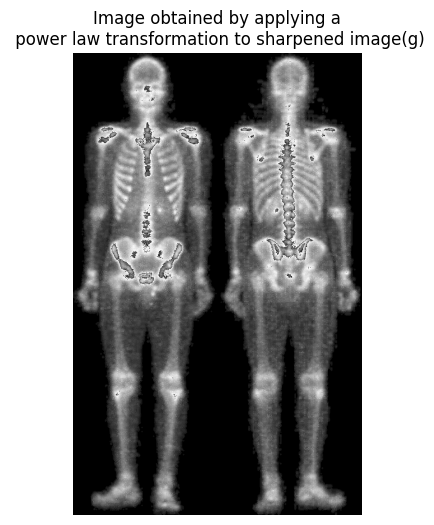

In [96]:
# Image obtained by applying a power-law transformation to sharpened image(g)
power_law_transformation = np.array(255*(Image_masked/255)**0.5, dtype='uint8')
power_law_transformation = normalize_function(power_law_transformation)

plotting_image(power_law_transformation,
               "Image obtained by applying a\n power law transformation to sharpened image(g)")
